In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


First few rows of the dataset:
   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  

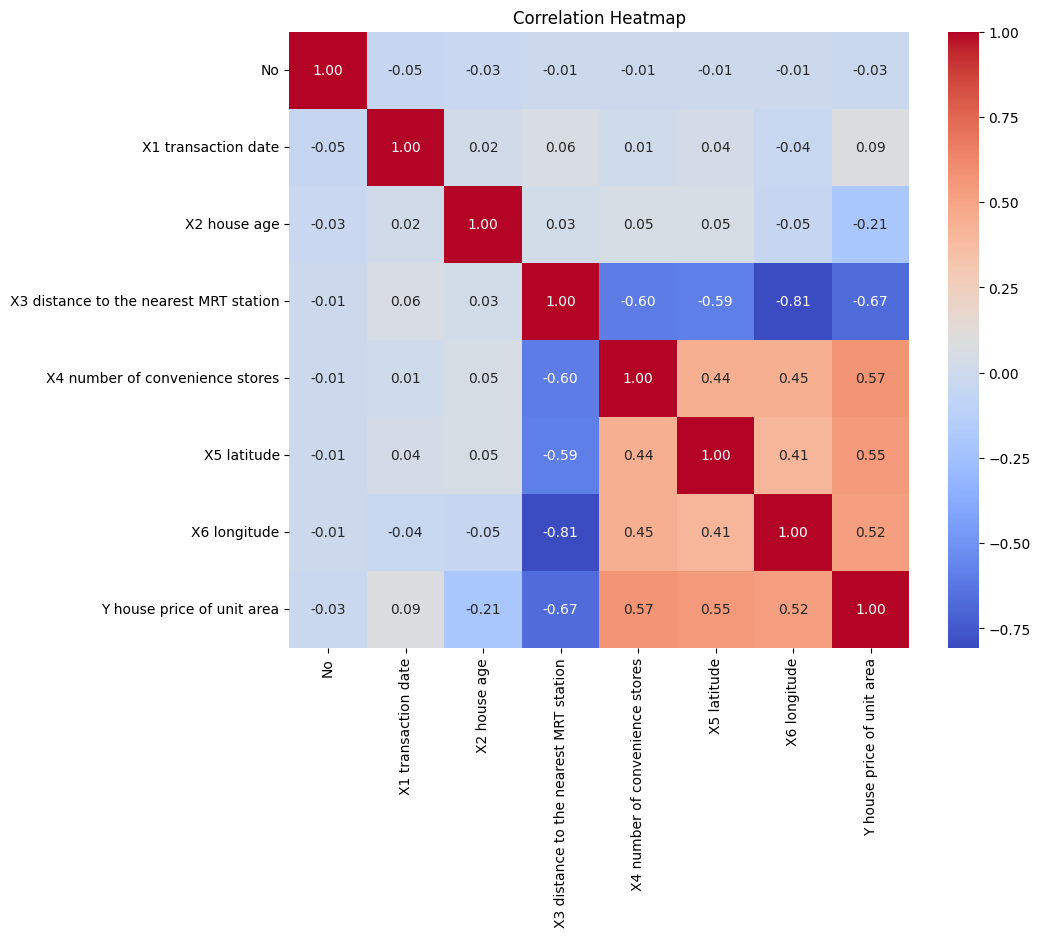

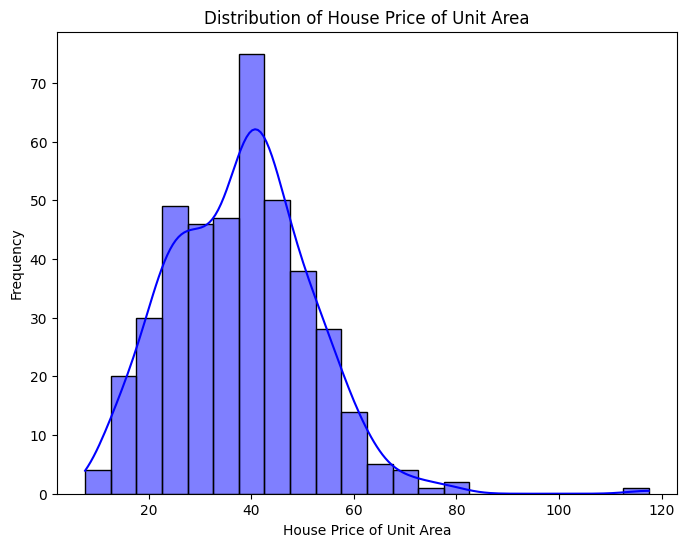

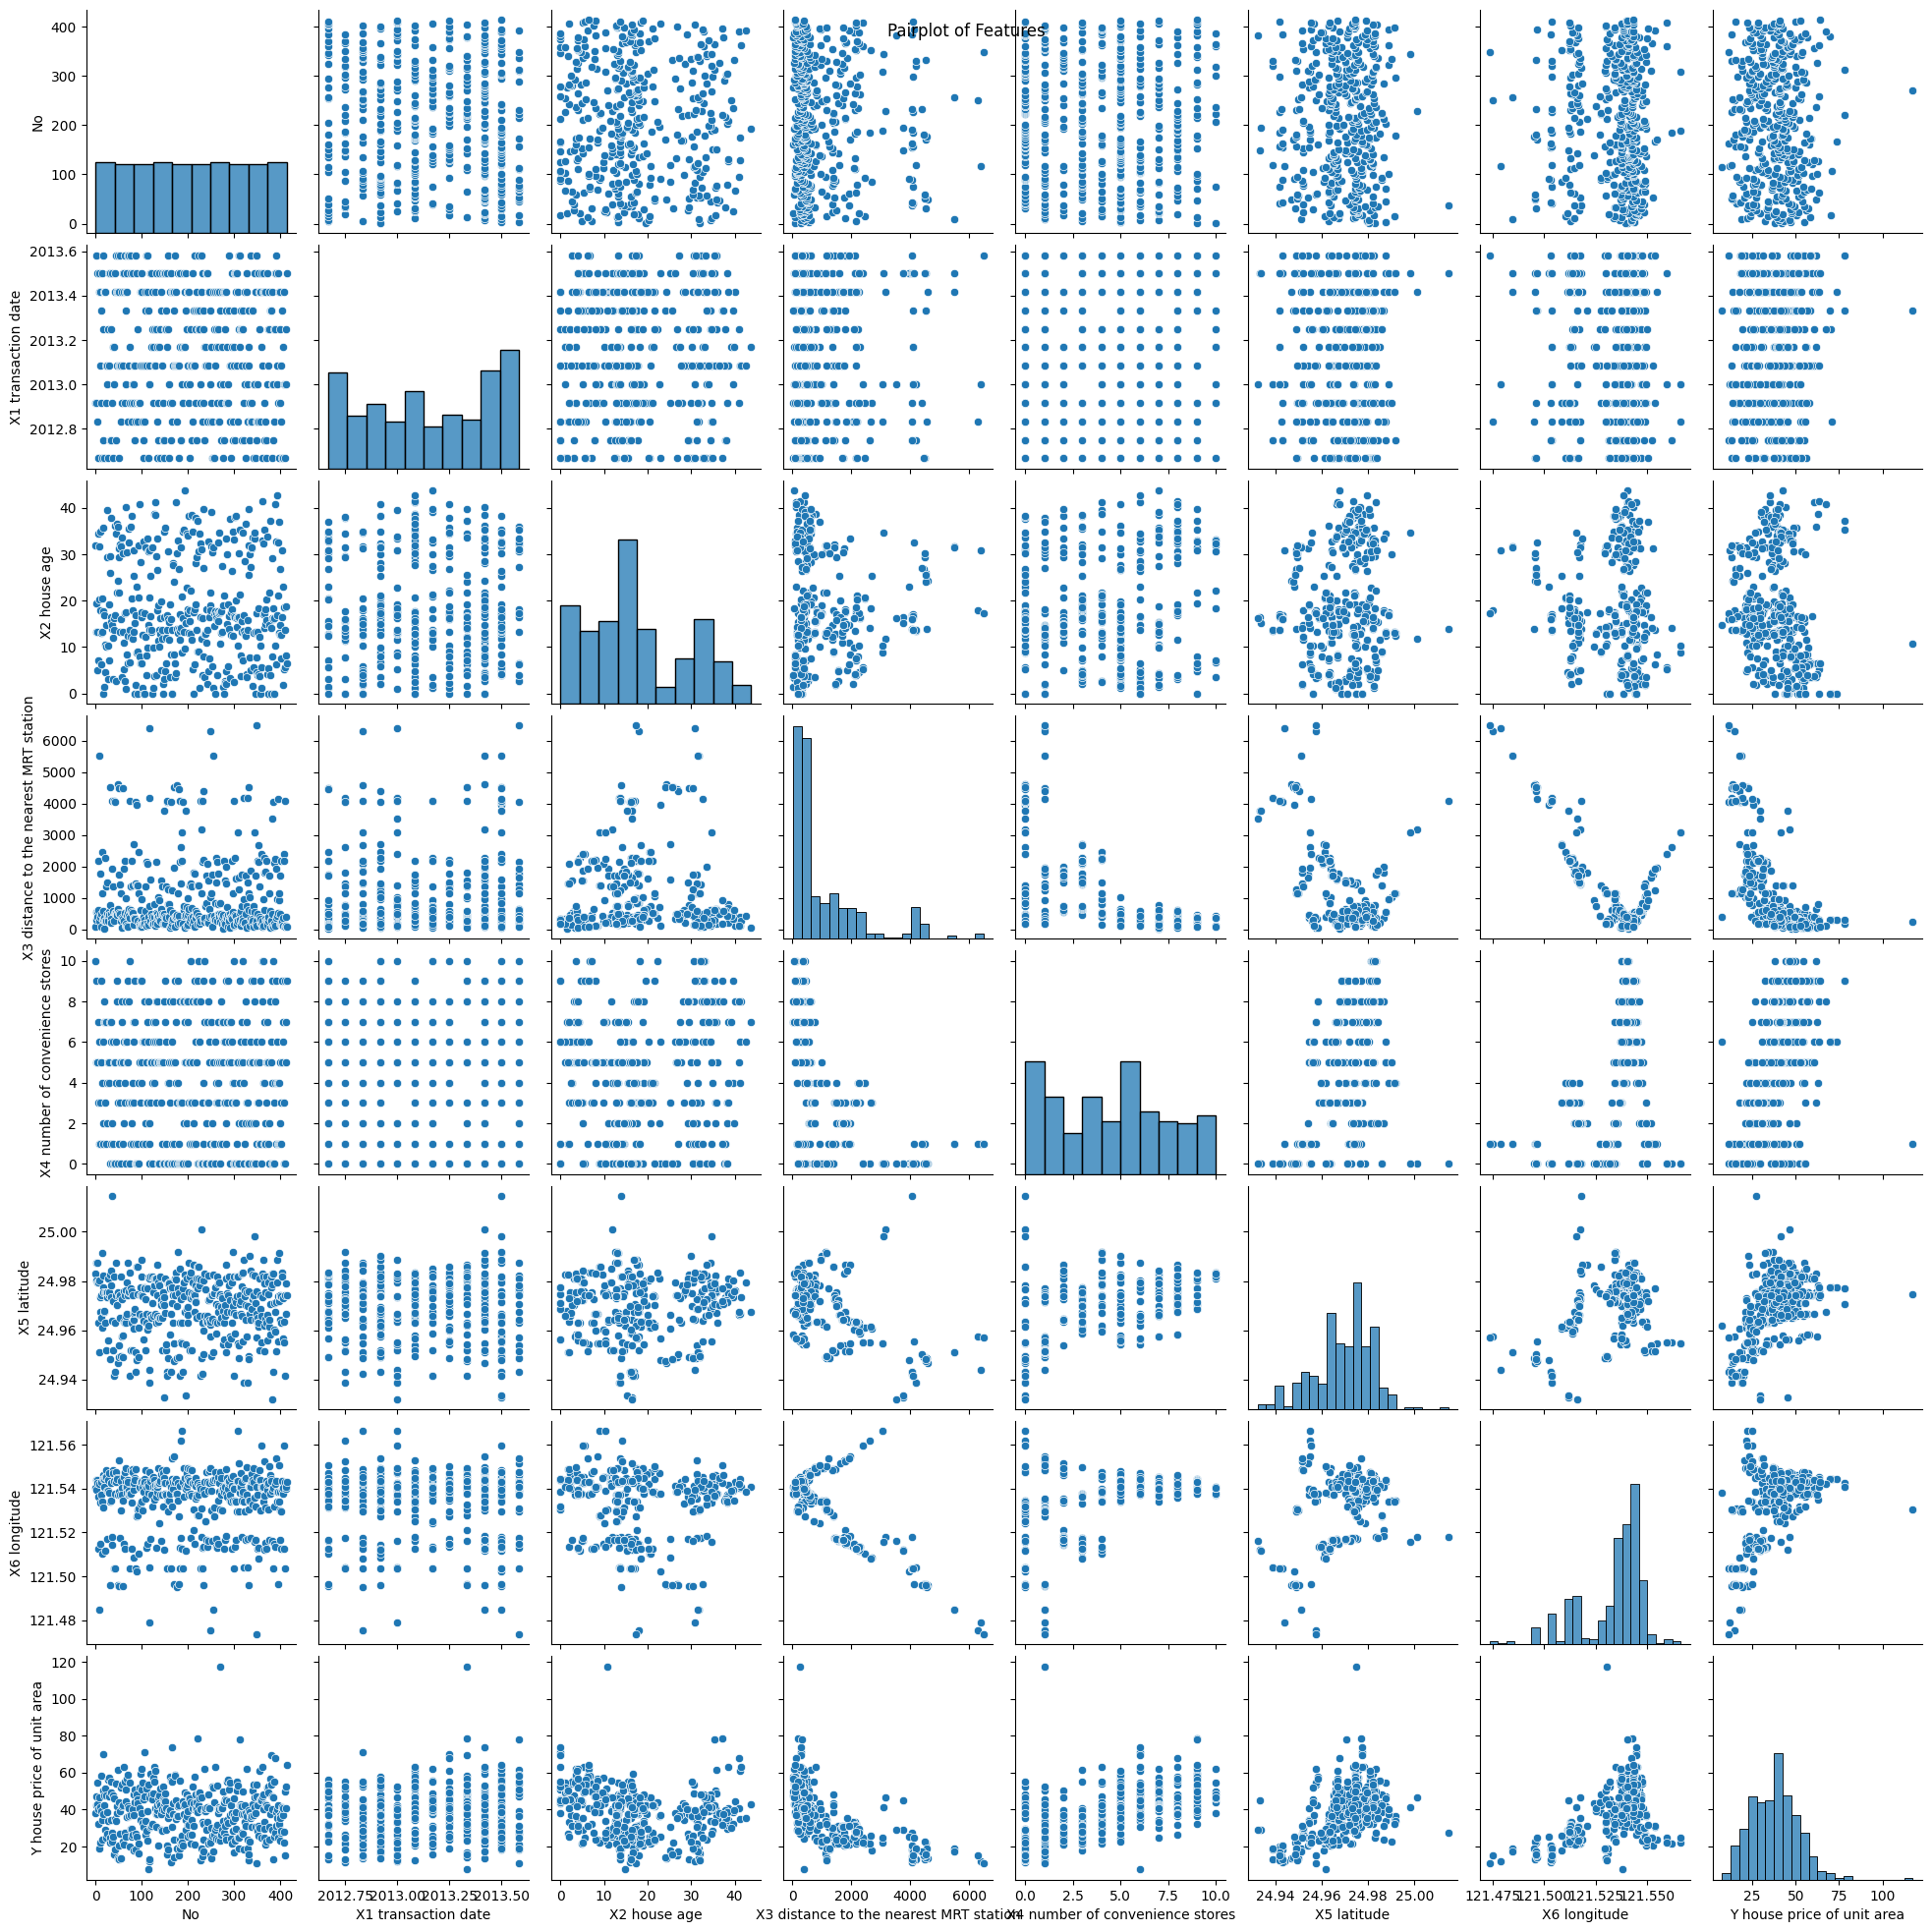


Missing values:
No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

Number of duplicate rows: 0

Shape of cleaned dataset after handling missing values and duplicates: (414, 8)


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/drive/MyDrive/Real estate.csv"
real_estate_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(real_estate_data.head())

# Summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(real_estate_data.describe())

# Correlation matrix
correlation_matrix = real_estate_data.corr()
print("\nCorrelation matrix:")
print(correlation_matrix)

# Visualizing correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(real_estate_data['Y house price of unit area'], kde=True, color='blue')
plt.title("Distribution of House Price of Unit Area")
plt.xlabel("House Price of Unit Area")
plt.ylabel("Frequency")
plt.show()

# Pairplot to visualize relationships between features
sns.pairplot(real_estate_data)
plt.suptitle("Pairplot of Features")
plt.show()

# Handle missing values
# Check for missing values
missing_values = real_estate_data.isnull().sum()
print("\nMissing values:")
print(missing_values)

# Drop rows with missing values
real_estate_data.dropna(inplace=True)

# Handle duplicates
# Check for duplicate rows
duplicate_rows = real_estate_data.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_rows)

# Drop duplicate rows
real_estate_data.drop_duplicates(inplace=True)

# Print the shape of the cleaned dataset
print("\nShape of cleaned dataset after handling missing values and duplicates:", real_estate_data.shape)

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Prepare the data for training
X = real_estate_data.drop(columns=['Y house price of unit area'])  # Features
y = real_estate_data['Y house price of unit area']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree model
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

# Make predictions on the test set using decision tree
y_pred_dt = decision_tree.predict(X_test)

# Evaluate the decision tree model
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

print("Decision Tree Metrics:")
print("Mean Squared Error (MSE):", mse_dt)
print("Mean Absolute Error (MAE):", mae_dt)
print("Root Mean Squared Error (RMSE):", rmse_dt)
print()

# Train the random forest model
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions on the test set using random forest
y_pred_rf = random_forest.predict(X_test)

# Evaluate the random forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("Random Forest Metrics:")
print("Mean Squared Error (MSE):", mse_rf)
print("Mean Absolute Error (MAE):", mae_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)

# Compare the performance of the models
if mse_rf < mse_dt and mae_rf < mae_dt and rmse_rf < rmse_dt:
    print("\nRandom Forest is preferred for analyzing the data.")
elif mse_rf > mse_dt and mae_rf > mae_dt and rmse_rf > rmse_dt:
    print("\nDecision Tree is preferred for analyzing the data.")
else:
    print("\nBoth models perform similarly. Further analysis may be needed.")

Decision Tree Metrics:
Mean Squared Error (MSE): 53.89337349397591
Mean Absolute Error (MAE): 5.360240963855421
Root Mean Squared Error (RMSE): 7.341210628634483

Random Forest Metrics:
Mean Squared Error (MSE): 31.859230951807227
Mean Absolute Error (MAE): 3.8668554216867457
Root Mean Squared Error (RMSE): 5.644398192173123

Random Forest is preferred for analyzing the data.
